In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
customers_df = pd.read_csv("customers.csv")

In [3]:
customers_df.columns

Index(['income', 'age'], dtype='object')

In [4]:
customers_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

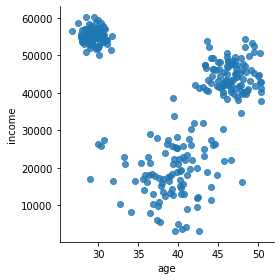

In [6]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );

Clustering - 3

In [7]:
from sklearn.cluster import KMeans

In [8]:
clusters = KMeans(3, init='k-means++')
clusters.fit( customers_df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
customers_df["clusterid"] = clusters.labels_

In [10]:
customers_df.head()

,income,age,clusterid
0,41100.0,48.75,1
1,54100.0,28.10,2
2,47800.0,46.75,1
3,19100.0,40.25,0
4,18200.0,35.80,0


In [11]:
customers_df.to_csv("CLUSTER_OUPUT.csv")

In [12]:
markers = ['+','^','.']

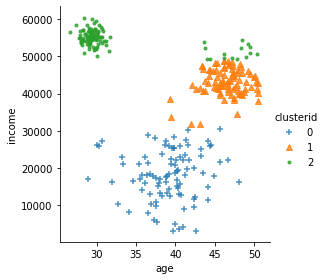

In [13]:
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );

In [14]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(customers_df, clusters.labels_, metric="euclidean")

0.6821437494818353

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [17]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

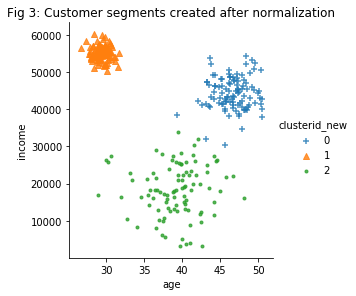

In [18]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );
plt.title( "Fig 3: Customer segments created after normalization");

In [19]:
clusters.cluster_centers_

array([[1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01],
       [5.46756522e+04, 3.17004348e+01]])

In [20]:
customers_df.groupby( 'clusterid' )['age',
'income'].agg( ["mean",
'std'] ).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  46.419101  2.289620  43053.932584  3613.769632
2         2  31.700435  6.122122  54675.652174  2362.224320

In [21]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(scaled_customers_df, clusters_new.labels_, metric="euclidean")

0.7394709511636628

In [33]:
cluster_range = range( 1, 25 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_customers_df )
    cluster_errors.append( clusters.inertia_ )
    print(silhouette_score(scaled_customers_df, clusters_new.labels_, metric="euclidean"))

0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628
0.7394709511636628


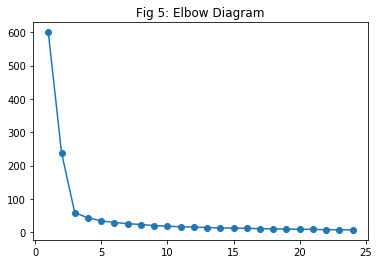

In [34]:
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig 5: Elbow Diagram");

In [24]:
beer_df = pd.read_csv( 'beer.csv' )

In [25]:
beer_df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [26]:
beer_df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

In [28]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3 , init='k-means++',random_state=42 )
clusters_new.fit( scaled_beer_df )
beer_df["clusterid_new"] = clusters_new.labels_

In [29]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(scaled_beer_df, clusters_new.labels_, metric="euclidean")

0.45777415910909475

In [30]:
cluster_range = range( 2, 19 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_beer_df )
    cluster_errors.append( clusters.inertia_ )
    print(silhouette_score(scaled_beer_df, clusters_new.labels_, metric="euclidean"))

0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475
0.45777415910909475


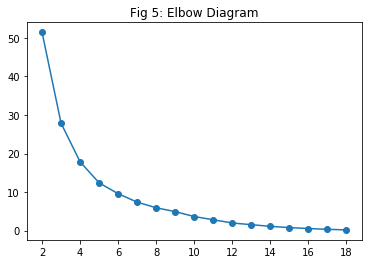

In [31]:
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig 5: Elbow Diagram");

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
h_clusters = AgglomerativeClustering()
h_clusters.fit(scaled_beer_df)
beer_df["h_clusterid"] = h_clusters.labels_

In [34]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid_new,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,1,1
3,Kronenbourg,170,7,5.2,0.73,2,0
4,Heineken,152,11,5.0,0.77,2,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
8,Miller_Lite,99,10,4.3,0.43,1,1
9,Budweiser_Light,113,8,3.7,0.40,1,1


In [35]:
beer_df.to_csv("Cluster_for_Beer.csv", index = False)

In [37]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

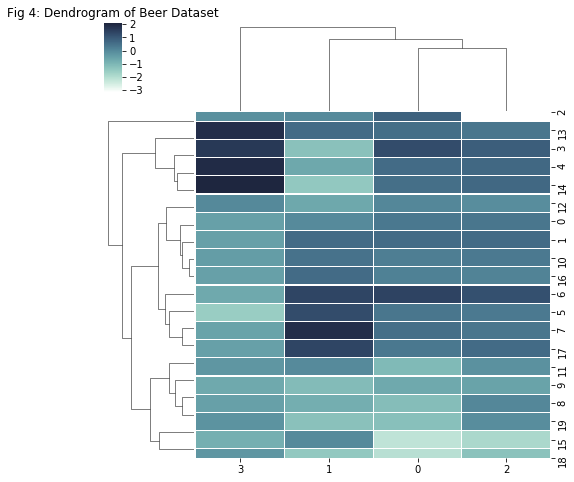

In [38]:
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,figsize = (8,8) );
plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [52]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(scaled_beer_df, h_clusters.labels_, metric="euclidean")

0.31823936817062226